<class 'pandas.core.frame.DataFrame'>
Int64Index: 583 entries, 0 to 581
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   [Place     583 non-null    object
 1    Bib       581 non-null    object
 2    Name      578 non-null    object
 3    Gender    578 non-null    object
 4    City      578 non-null    object
 5    State     578 non-null    object
 6    Time      578 non-null    object
 7    Gun Time  578 non-null    object
 8    Team]     578 non-null    object
dtypes: object(9)
memory usage: 45.5+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 578 entries, 0 to 581
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   [Place     578 non-null    object
 1    Bib       578 non-null    object
 2    Name      578 non-null    object
 3    Gender    578 non-null    object
 4    City      578 non-null    object
 5    State     578 non-null    object
 6    Time

/var/folders/qm/s1f4csvs0wdg_kqp662fj4k40000gp/T/ipykernel_92190/416150273.py:120: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(x, hist=True, kde=True, rug=False, color='m',


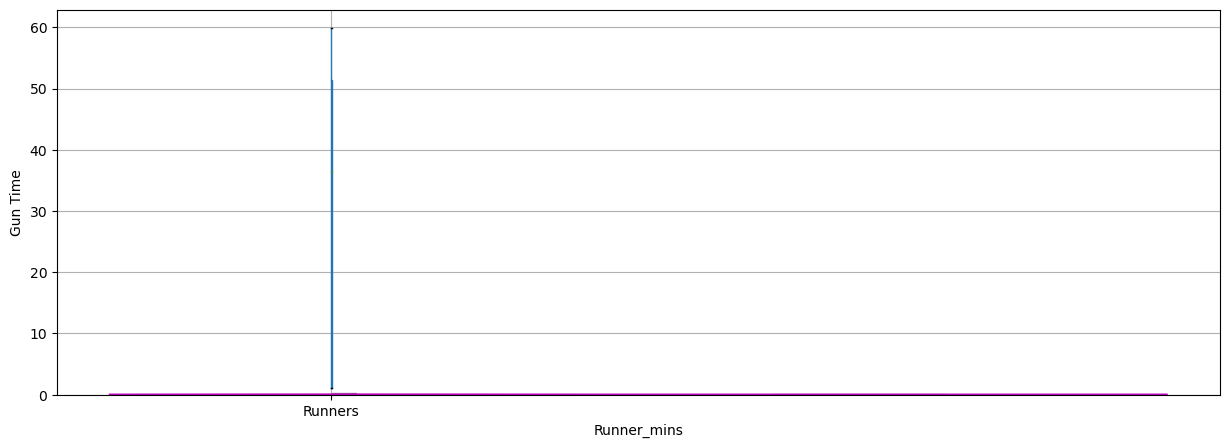

        Runner_mins                                                  \
              count       mean        std  min       25%        50%   
 Gender                                                               
 F            163.0  14.870961  23.067537  1.0  1.083333   1.216667   
 M            414.0  30.617311  24.731439  1.0  1.150000  45.233333   

                               
               75%        max  
 Gender                        
 F       44.083333  59.816667  
 M       52.179167  59.900000  


/var/folders/qm/s1f4csvs0wdg_kqp662fj4k40000gp/T/ipykernel_92190/416150273.py:126: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(f_fuko, hist=True, kde=True, rug=False,
/var/folders/qm/s1f4csvs0wdg_kqp662fj4k40000gp/T/ipykernel_92190/416150273.py:128: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn

Text(0.5, 0.98, '')

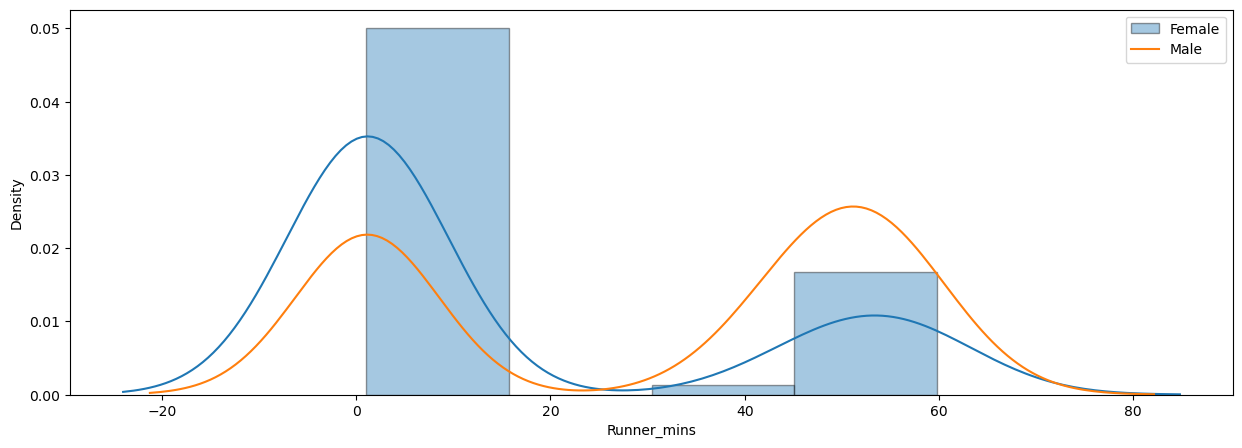

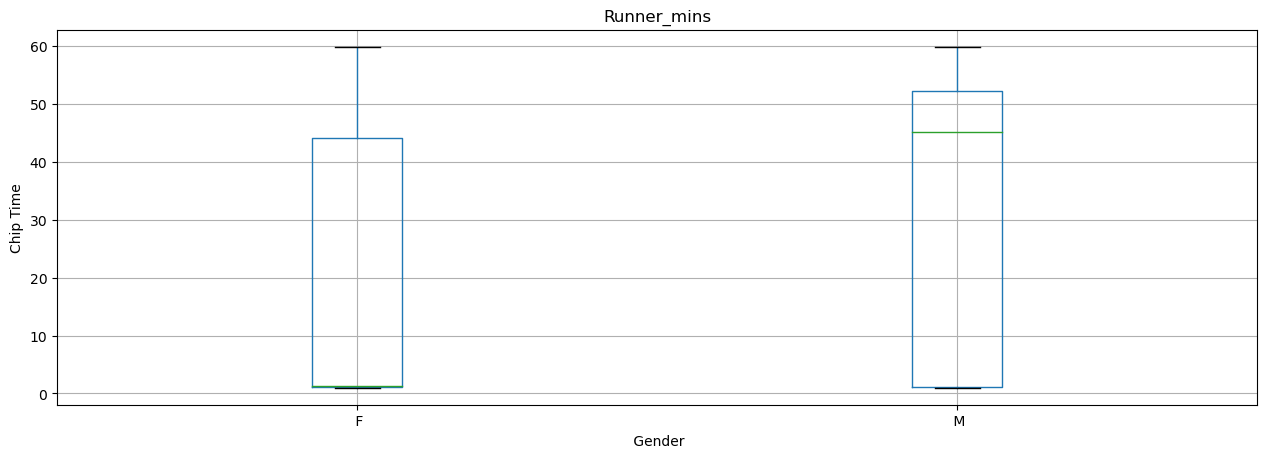

In [1]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from urllib.request import urlopen
from bs4 import BeautifulSoup
from pylab import rcParams

url = "http://www.hubertiming.com/results/2017GPTR10K"
# url = "https://www.hubertiming.com/results/2023WyEasterLong"
html = urlopen(url)

soup = BeautifulSoup(html, 'lxml')
title = soup.title
# print(title)

text = soup.get_text()
# print(text)
soup.find_all('a')

all_links = soup.find_all("a")
# for link in all_links:
#   print(link.get("href"))

# Print the first 10 rows for sanity check
rows = soup.find_all('tr')
# print(rows[:10])

for row in rows:
  row_td = row.find_all('td')
# print(row_td)
# type(row_td)

str_cells = str(row_td)
cleantext = BeautifulSoup(str_cells, "lxml").get_text()
# print(cleantext)

# Using regex to accomplish the above
list_rows = []
for row in rows:
  cells = row.find_all('td')
  str_cells = str(cells)
  clean = re.compile('<.*?>')
  clean2 = (re.sub(clean, '',str_cells))
  list_rows.append(clean2)
# print(clean2)
# type(clean2)

df = pd.DataFrame(list_rows)
df.head(10)

df1 = df[0].str.split(',', expand=True)
df1.head(10)

df1[0] = df1[0].str.strip('[')
df1.head(10)

col_labels = soup.find_all('th')

all_header = []
col_str = str(col_labels)
cleantext2 = BeautifulSoup(col_str, "lxml").get_text()
all_header.append(cleantext2)
# print(all_header)

df2 = pd.DataFrame(all_header)
df2.head()

df3 = df2[0].str.split(',', expand=True)
df3.head()

frames = [df3, df1]
df4 = pd.concat(frames)
df4.head(10)

df5 = df4.rename(columns=df4.iloc[0])
df5.head()

df5.info()
df5.shape

df6 = df5.dropna(axis=0, how='any')
df6.info()
df6.shape

df7 = df6.drop(df6.index[0])
df7.head()

df7.rename(columns={'[Place': 'Place'},inplace=True)
df7.rename(columns={' Team]': 'Team'},inplace=True)
df7.head()

df7['Team'] = df7['Team'].str.strip(']')
df7.head()

time_list = df7[' Gun Time'].tolist()
# You can use a for loop to convert 'Chip Time' to minutes
time_mins = []
for i in time_list:
  Time = i.split(':')
  math = (int(Time[0]) * 60 + int(Time[1]))/60
  time_mins.append(math)
print(time_mins)

df7['Runner_mins'] = time_mins
df7.head()

df7.describe(include=[np.number])

rcParams['figure.figsize'] = 15, 5
df7.boxplot(column='Runner_mins')
plt.grid(True, axis='y')
plt.ylabel('Gun Time')
plt.xticks([1], ['Runners'])

x = df7['Runner_mins']
ax = sns.distplot(x, hist=True, kde=True, rug=False, color='m',
bins=25, hist_kws={'edgecolor':'black'})
plt.show()

f_fuko = df7.loc[df7[' Gender']==' F']['Runner_mins']
m_fuko = df7.loc[df7[' Gender']==' M']['Runner_mins']
sns.distplot(f_fuko, hist=True, kde=True, rug=False,
hist_kws={'edgecolor':'black'}, label='Female')
sns.distplot(m_fuko, hist=False, kde=True, rug=False,
hist_kws={'edgecolor':'black'}, label='Male')
plt.legend()

g_stats = df7.groupby(" Gender", as_index=True).describe()
print(g_stats)

df7.boxplot(column='Runner_mins', by=' Gender')
plt.ylabel('Chip Time')
plt.suptitle("")